# Import Libraries

In [22]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import joblib
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset

In [27]:
df = pd.read_csv("Training dataset/emails.csv")

In [28]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


# Checking if null values

In [142]:
df.isnull().sum()

text    0
spam    0
dtype: int64

# Checking if duplicate rows

In [143]:
df['text'].nunique()

5695

In [144]:
df.shape

(5728, 2)

# Removing duplicate rows

In [145]:
df = df.drop_duplicates()

In [146]:
df.shape

(5695, 2)

# Ploting value counts of spam(1) and non-spam(0)

spam
0    4327
1    1368
Name: count, dtype: int64

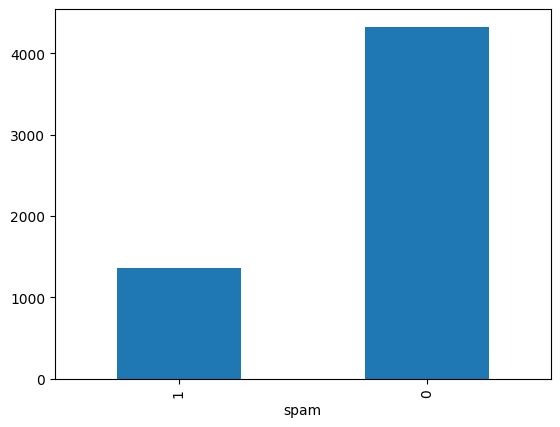

In [147]:
df.spam.value_counts().sort_values().plot(kind = 'bar')
df.spam.value_counts()

In [148]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/apoorv/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/apoorv/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Data Cleaning

In [30]:
def preprocess_text(text):
    # Remove special characters, punctuation, and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenize the text into words
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Join the words back into a single string
    text = ' '.join(words)

    return text


In [31]:
df['cleaned_text'] = df['text'].apply(preprocess_text)

In [32]:
df.head()

,text,spam,cleaned_text
0,Subject: naturally irresistible your corporate...,1,subject naturally irresistible corporate ident...
1,Subject: the stock trading gunslinger fanny i...,1,subject stock trading gunslinger fanny merrill...
2,Subject: unbelievable new homes made easy im ...,1,subject unbelievable new homes made easy im wa...
3,Subject: 4 color printing special request add...,1,subject color printing special request additio...
4,"Subject: do not have money , get software cds ...",1,subject money get software cds software compat...


# Defining feature and label

In [33]:
X = df['cleaned_text']
y = df['spam']

# Vectorizing the text into numerical values

In [34]:
# Text vectorization using TF-IDF
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X)


# Split the data into training and testing sets

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=0)

# List of classifiers

In [155]:
# Define a list of classifiers
classifiers = {
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(random_state=0),
    "Decision Tree": DecisionTreeClassifier(criterion='entropy', random_state=0),   
}

# Comparing different classifers to predict spam

In [156]:
results = []

# Iterate through classifiers
for classifier_name, classifier in classifiers.items():
    # Perform k-fold cross-validation (k=5) and calculate mean accuracy
    scores = cross_val_score(classifier,X_vec, y, cv=5, scoring='accuracy')
    mean_accuracy = np.mean(scores)

    # Train the classifier on the training set
    classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Store the results
    result = {
        "Classifier": classifier_name,
        "Accuracy": accuracy,
        'Cross-Validation Accuracy': mean_accuracy,        
    }

    results.append(result)

 # Create a DataFrame from the results
results_df = pd.DataFrame(results)


In [157]:
# Display the result table
print("Results Table:\n")
results_df

Results Table:



,Classifier,Accuracy,Cross-Validation Accuracy
0,Naive Bayes,0.906058,0.905531
1,Random Forest,0.972783,0.976295
2,Support Vector Machine,0.986831,0.988411
3,K-Nearest Neighbors,0.979807,0.981212
4,Logistic Regression,0.972783,0.979807
5,Decision Tree,0.958736,0.959263


# Train a SVM classifier

In [158]:
trained_classifier = SVC()
trained_classifier.fit(X_train, y_train)

SVC()

# Prediction

In [159]:
y_pred = trained_classifier.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [181]:
text = '''Subject: Win Big Money Today!

Dear Rohan,

We have detected that you have won a grand prize of $1,000,000 from our recent lottery. 
Please click on the link below to claim your prize.

http://www.marketingbyinternet.com/mo/e56508df639f6ce7d55c81ee3fcd5ba8/

Warm regards,
Karan
'''

text = """Subject: Invitation to the Company Annual Dinner

Dear Rohan,

We are excited to invite you to our annual company dinner, which will be held on Friday, November 20th, at the Grand Plaza Hotel. This is a wonderful opportunity for all employees to come together, celebrate our achievements, and enjoy an evening of good food and camaraderie.

Event Details:
Date: Friday, November 20th
Time: 6:30 PM
Venue: Grand Plaza Hotel, Ballroom A
Dress Code: Business Casual

We have planned a delicious three-course dinner, entertainment, and a few surprises in store for you. It's a great occasion to relax and have a good time with your colleagues.

Please RSVP by November 10th to ensure we have an accurate headcount for the event. You can confirm your attendance by replying to this email or contacting our event coordinator, Sarah, at [Email Address] or [Phone Number].

We look forward to seeing you at the dinner and celebrating another successful year together!

Warm regards,
Karan
"""
text = preprocess_text(text)
text_vec = vectorizer.transform([text])
y_pred_single = trained_classifier.predict(text_vec)
print(y_pred_single)

[1]


# Accuracy 

In [182]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9868305531167691


# Confusion Matrix

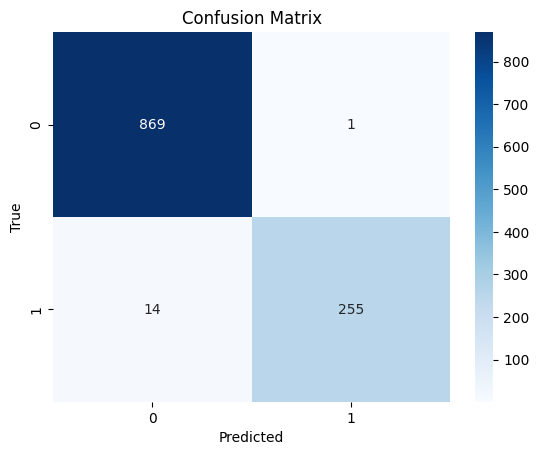

In [183]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification Report

In [184]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       870
           1       1.00      0.95      0.97       269

    accuracy                           0.99      1139
   macro avg       0.99      0.97      0.98      1139
weighted avg       0.99      0.99      0.99      1139



# Creating pickle File

In [185]:
# Save the best classifier as a .pkl file
joblib.dump(trained_classifier, 'models/trained_classifier.pkl')
joblib.dump(vectorizer, 'models/vectorizer.pkl')

['models/vectorizer.pkl']